<a href="https://www.ufabc.edu.br/">
    <img src="https://www.ufabc.edu.br/images/aci/logotipo/principal.png" width="94" align="center">
</a>

Nunzio Torrisi - 2022

<h1>Mini Tutorial sobre AWK</h1>

Este breve tutorial introduz como processar texto com a ferramenta AWK para agilizar o trabalho de formatação de dados a ser posteriormente propriamente importados e processado em plataformas especificas.

## Porque AWK

---

Existem muitas ferramentas para processar texto.
Quando temos tabelas de dados em forma de documento de texto, é frequente a necessidade de manipular linha por linha para conseguir um formato compatível com uma ferramenta de processamento especifica para extrair indicadores gráficos, estatísticas e vários tipos de relatórios conforme as diferentes necessidades.

Dados em formato de documento de texto, podem ser produzidos por equipamento de laboratório medico, durante um sequenciamento genético, de automação industrial em processo de manufatura, e de telecomunicações na escritura de linhas de logs de máquinas VoIP.
Assim como tabelas de dados em formato de texto podem ser também a forma principal que um software de gestão de venda ou de gestão de estoque, que usam para exportar os dados para outros softwares de análise de dados.

### O ciclo de trabalho

Costuma-se identificar o processo de transformação dos dados de texto para um formato adequado para sucessiva manipulação como pre-processamento. Também com a finalidade de manter uma flexibilidade e uma fácil manutenção futura do inteiro processo de análise de dados, costumasse  deixar o pre-processamento como um bloco computacional externo e intermediário, entre quem produz os dados brutos e quem manipula os dados para extrair informações.

Dessa forma, a tarefa de filtrar, formatar e preparar dados para um sucessivo processamento em documento Excel,  Matlab, Python ou outras plataformas, ganha robustez, simplifica o processamento usando uma formatação adequada e permite em algum caso repetir de forma programada o ciclo inteiro de trabalho como representado na figura n.1

### AWK para pre-processamento

O AWK é uma ferramenta especifica para interpretar e transformar sequencias de texto como uma estrutura de dados. A escolha do AWK para o pre-processamento de dados em formato de texto apresenta diferentes vantagens.

Como primeiro ponto de força, o AWK, é um software testado e usado especificamente para manipular texto ha mais de 40 anos. Ele é presente em quase todos os sistemas operacionais usados em computadores de escritórios, unidades centrais de processamento e sistemas embarcados.

O compreendimento dos métodos de uso do AWK é menos extenso que de uma linguagem de programação como C pu Python.

O desempenho do AWK para manipular texto é extremamente otimizado para reduzir o uso de memória e usar de forma eficaz o recurso de computacional disponível.

A documentação disponível e os casos de uso são amplos e de domínio publico.

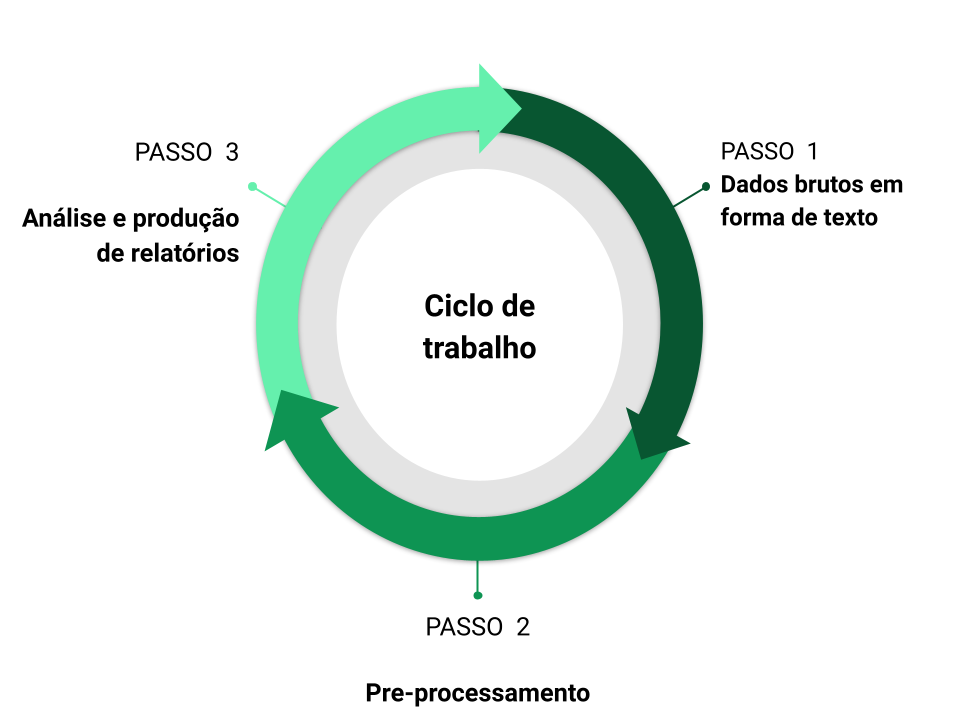

Figura n.1

### Breve historia do AWK

AWK nasce na década 70 quando a computação era sinonimo de grandes quartos de equipamentos eletrônicos para processar Kilobytes de dados. Naquele momento histórico o sistema operacional Unix e às ferramentas a linha de comando dele eram o padrão em ambientes científicos e comerciais. Assim como hoje as variedades de aplicativos nos smartphones são o ponto de força, naquela época as ferramentas que acompanhavam o sistema operacional Unix, eram a verdadeira força capaz de atrair programadores e administradores de sistemas.

A desproporção entre o tamanho de documentos texto a ser processado e a memória disponível levou três cientistas da computação, Alfred Aho, Peter J. Weinberger, e Brian Kernighan ao projeto de um processador texto que não tivesse necessidade de carregar um documento inteiro dentro da memória, mas apenas o mínimo conjunto de sequência de texto que completava uma unidade de dado. O caso mais simples e mais comum é quando um documento de texto contem em cada linha uma estrutura de dados como, para exemplo, nome, sobrenome, telefone e endereço.
Se então cada linha do documento de texto contem os dados completo de todas as pessoas da minha lista, o AWK poderia filtrar o telefone, abreviar o nome ou fazer outras mudanças no documento operando de forma atômica linha por linha e reaproveitando o mesmo uso de memória para todas as linhas a seguir de forma ordenada.

O nome AWK é apenas o conjunto das iniciais dos nomes dos três cientistas que pensaram esta nova forma de processar documentos de texto.


## Trabalhando com sequências de dados
----

O AWK tem uma variável interna para limitar uma unidade de dado, linha de dados, dentro uma estrutura de texto. Esta variável é designada por *RS* e por padrão ela tem o valor do retorno de linha(*RS="\n"*).
Para um grande número de caso de uso esse valor de RS é adequado para extrair uma linha a cada vez, como para exemplo as linhas de um documento CSV tipo aquele na figura n.2



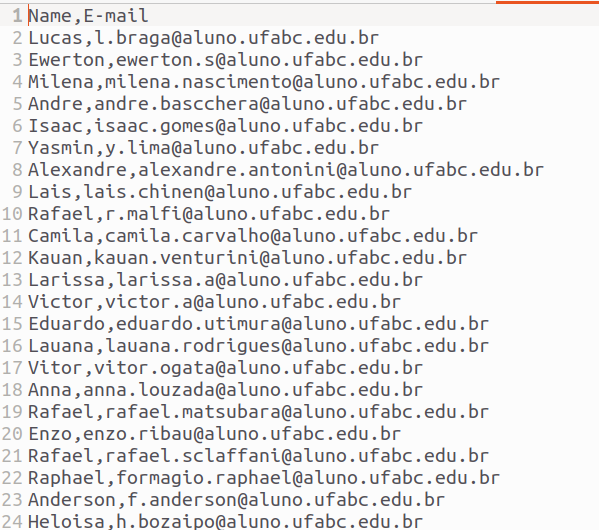

Figura n.2

Todas as operações de manipulação que AWK pode realizar são realizadas de forma ordenada avançando dentro de um documento de texto e lendo e processando atomicamente linha por linha*(RS="\n")*. Neste caso, o mais comum, o AWK precisará apenas de uma memória de trabalho bem pequena quando comparada com a memória necessária para carregar todas as linhas do documento dentro da memória de trabalho.

A separação dos campos interno a estrutura de cada linha é realizada pela variável interna *FS* do AWK, que por padrão é um ou mais espaços brancos, ou de tabulação(*FS="[ \t\n]+"*).

Depois o AWK ler e separar os campo de cada linha, ele enumera cada campo usando o prefixo "\$" antes do índice de cada campo. O primeiro campo será então reconhecido como *\$1*, o segundo como *\$2* e assim a seguir até o último campo que pode ser alternativamente reconhecido como *\$NF*. O número total de linhas é mantido na variável *\$NR*. A figura n.3 monstra a estrutura logica de cada campo separado pelo AWK em cada linha lida. A linha inteira, sem considerar a separação de campos interna, tem o nome de variável *\$0*.

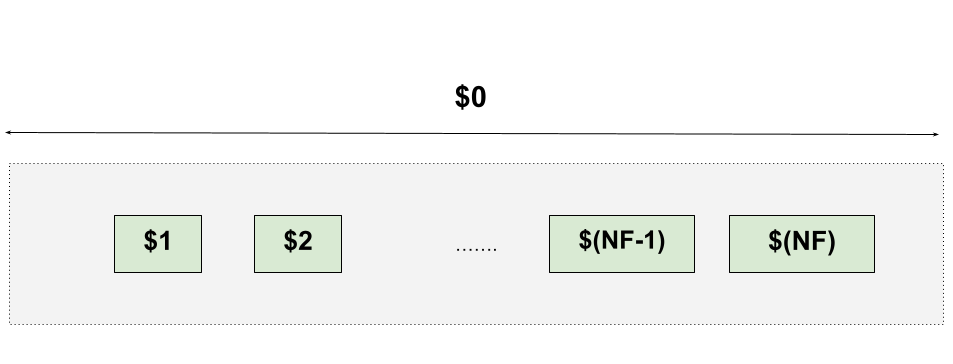

Figura n.3

### Logica de funcionamento do AWK

Entendido como o AWK separa e captura os campos de cada linha de texto, o próximo passo é escrever uma estratégia de processamento que o AWK executará linha por linha.

Todas as estratégias de **um programa AWK tem uma lista de condições logicas a ser verificadas nos campos de cada linha e uma lista de consequentes ações a ser realizadas quando as condições logicas são verdadeiras**.

A lista de condições logicas são geralmente operações de reconhecimento exato ou parcial de string. O reconhecimento parcial é realizado por meio de uma ou mais expressões regulares.

As etapas de um programa AWK, leitura de uma nova linha, reconhecimento dos seus campos e eventuais ações a ser realizadas com eles, são perpetuadas de forma cíclica até a última linha de texto encontrada. De forma sequencial e ordenada, essas etapas, resumida na figura 4, são bem parecidas de uma estrutura de repetição de uma qualquer linguagem de programação, com a diferença que no AWK este tipo de repetição já esta pronta para o uso.

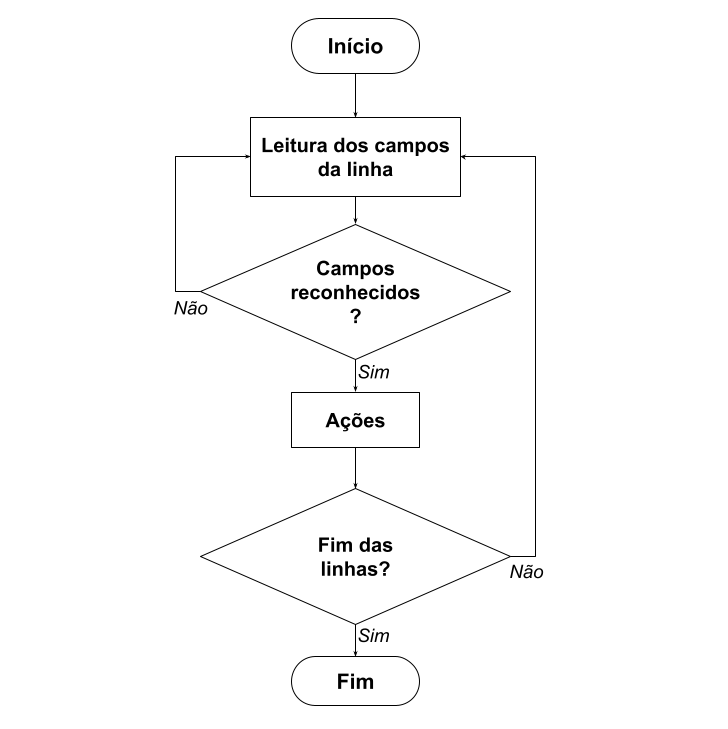

Figura n.4

## Exemplos de uso do AWK

---

Os comandos de um programa AWK podem estar escritos dentro de documento de texto(para exemplo programa.awk) ou diretamente na linha de comando embutidos por aspas.
A estrutura de um comando AWK é sempre no formato *padrão \{ ação \}*.

**NOTA: Neste documento todas linhas de comando tem o "!" na frente apenas porque a execução e feita dentro do ambiente Colab.**

### Uso básico do AWK

Como primeiro exemplo vamos considerar o documento de texto *names.txt* que inclui as linhas a seguir com nome e sobrenome em cada linha:

```
Renetta Guidi
Bee Adams
Beulah Slaubaugh
Jill Mitchell
Carleen Brown
Ann Biltz
Anita Cartwright
George Meeks
James Dyson
Evette Schuyler
```
Podemos instruir na linha de comando o AWK para imprimir apenas o primeiro nome de cada linha usando o comando *print $1* da forma:

In [ ]:
!awk '$0 {print $1}' names.txt

Renetta
Bee
Beulah
Jill
Carleen
Ann
Anita
George
James
Evette


Observe que neste caso o padrão a ser encontrado é *\$0*, que representa a linha inteira, e a ação é print *\$1*, que imprime apenas o primeiro campo identificado pelo espaço branco.

Um segundo exemplo poderia ser a seleção dos primeiro nomes de tamanho menor igual a 4 caracteres.

In [ ]:
!awk 'length($1)<=4 {print $1}' names.txt

Bee
Jill
Ann


Observe que neste segundo caso de uso o padrão a ser encontrado é *length(\$1)<=4*, que seleciona apenas as linhas com nomes de até 4 caracteres.

Como terceiro exemplo queremos que seja gerado um e-mail com domínio aluno.ufabc.edu.br por cada nome no documento names.txt

In [ ]:
!awk '$0 {print $1"@aluno.ufabc.edu.br"}' names.txt

Renetta@aluno.ufabcv.edu.br
Bee@aluno.ufabcv.edu.br
Beulah@aluno.ufabcv.edu.br
Jill@aluno.ufabcv.edu.br
Carleen@aluno.ufabcv.edu.br
Ann@aluno.ufabcv.edu.br
Anita@aluno.ufabcv.edu.br
George@aluno.ufabcv.edu.br
James@aluno.ufabcv.edu.br
Evette@aluno.ufabcv.edu.br


Observe que neste terceiro caso de uso o comando print do AWK aceita a concatenação do campo *\$1* com a string "@aluno.ufabc.edu.br"

### Uso de script AWK

Quando os comandos a ser passados para o AWK são extensos, é conveniente gravar eles dentro de um documento de texto com extensão .awk e sucessivamente executar o programa da seguinte forma:

```
awk -f programa.awk texto.txt
```

Diferentemente de antes, foi introduzido o parâmetro *f* para informar o AWK que os comandos estarão disponíveis dentro o file informado.


Vamos considerar o documento de texto names-emails-altura.txt que inclui as 10 linhas abaixo(NR=10) com nome, sobrenome, e-mail e altura em cada linha.

```
David Colemen David@aluno.ufabc.edu.br 166
David Mendoza David@aluno.ufabc.edu.br 170
Mary Watson Mary@aluno.ufabc.edu.br 162
Dennis Barnes Dennis@aluno.ufabc.edu.br 186
Theresa Hoyman Theresa@aluno.ufabc.edu.br 183
Juan Nguyen Juan@aluno.ufabc.edu.br 159
James Paulsen James@aluno.ufabc.edu.br 190
Donald Kelley Donald@aluno.ufabc.edu.br 157
Kristin Hall Kristin@aluno.ufabc.edu.br 180
Kathleen Medeiros Kathleen@aluno.ufabc.edu.br 162
```

Queremos criar um programa AWK imprima a altura media das pessoas dentro do documento acima.

Em forma de linha de comando os comandos AWK seria:


In [ ]:
!awk '$0 {soma+=$4} END {print "A altura média é "soma/NR}' names-emails-altura.txt

A altura média é 169.4


Observe que a variável *soma* é incrementada a cada linha com o valor do campo *$4* que contem a altura. A palavra-chave END é seguida de um bloco de comandos a ser executados depois a leitura da última linha do documento.

A mesma sequência de comandos escrita dentro um documento texto é proposta a seguir:

```
# programa.awk
{soma+=$4}
END {print "A altura média é "soma/NR}

```


In [ ]:
!awk -f programa.awk names-emails-altura.txt

A altura média é 169.4


Assim como a palavra-chave END, a palavra-chave BEGIN pode ser usada para executar alguns comandos antes da leitura da primeira linha.

Para exemplo podemos inserir um cabeçalho antes da imprimir o texto do documento names-emails-altura.txt

```
# programa2.awk
BEGIN { print "Nome Email Altura"}
{soma+=$4; print $0}
END {print "A altura média é "soma/NR}
```

In [ ]:
!awk -f programa2.awk names-emails-altura.txt

Nome Email Altura
David Colemen David@aluno.ufabc.edu.br 166
David Mendoza David@aluno.ufabc.edu.br 170
Mary Watson Mary@aluno.ufabc.edu.br 162
Dennis Barnes Dennis@aluno.ufabc.edu.br 186
Theresa Hoyman Theresa@aluno.ufabc.edu.br 183
Juan Nguyen Juan@aluno.ufabc.edu.br 159
James Paulsen James@aluno.ufabc.edu.br 190
Donald Kelley Donald@aluno.ufabc.edu.br 157
Kristin Hall Kristin@aluno.ufabc.edu.br 180
Kathleen Medeiros Kathleen@aluno.ufabc.edu.br 162
A altura media é 171.5


### Uso do AWK dentro Google Colab

A ferramenta AWK é presente dentro quase todos sistemas operacionais. Ele é até presente dentro o conjunto mínimo de ferramentas a linha de comando disponíveis no Google Colab. Para finalidades educativas apresentamos a seguir alguns exemplos de uso dentro de um notebook Colab.
A seguir alguns comandos para familiarizar com a linha de comando AWK dentro do Colab.

Verifica da versão instalada do AWK.

In [ ]:
!awk -W version

mawk 1.3.3 Nov 1996, Copyright (C) Michael D. Brennan

compiled limits:
max NF             32767
sprintf buffer      2040


## ANEXO I - Geração de texto para exemplos e exercícios
___
A seguir, para finalidades didáticas, é apresentado o código Python usado para geração dos documentos usados nesse tutorial.

O primeiro passo para gerar dados aleatórios fictícios de pessoas é instalar a biblioteca *names* por meio do comando *pip*. A seguir será possível incluir o uso da mesma biblioteca no gerador por meio do comando *import*.

In [ ]:
!pip install names
import names

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 789 kB 5.2 MB/s 
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803699 sha256=694e5378586ebe5559fc9a4eb9ebc31319a1f7a07a7f7d7f68fc8115cc4c75a7
  Stored in directory: /root/.cache/pip/wheels/05/ea/68/92f6b0669e478af9b7c3c524520d03050089e034edcc775c2b
Successfully built names


In [ ]:
with open('names.txt', 'a') as testwritefile:
    for i in range(10):
      name = names.get_full_name()
      print(name)
      testwritefile.write(name+"\n")

Renetta Guidi
Bee Adams
Beulah Slaubaugh
Jill Mitchell
Carleen Brown
Ann Biltz
Anita Cartwright
George Meeks
James Dyson
Evette Schuyler


Podemos acrescentar no nosso gerador de documento de texto mais um campo e-mail com domínio 'aluno.ufabc.edu.br' apenas concatenando o primeiro nome com '@' e o domínio. Assim é gerado o documento names-emails.txt com o código a seguir.

In [ ]:
with open('names-emails.txt', 'a') as testwritefile:
    for i in range(10):
      name = names.get_full_name()
      email = name.split(' ')[0] +"@aluno.ufabc.edu.br"
      print(name,email)
      testwritefile.write(name+" "+email+"\n")

Michael Howard Michael@aluno.ufabc.edu.br
Leon Heckman Leon@aluno.ufabc.edu.br
Dawn Lawyer Dawn@aluno.ufabc.edu.br
Christopher Kidd Christopher@aluno.ufabc.edu.br
Emma Ell Emma@aluno.ufabc.edu.br
June Maymon June@aluno.ufabc.edu.br
Marcia Cahoon Marcia@aluno.ufabc.edu.br
Cheryl Owens Cheryl@aluno.ufabc.edu.br
Ann Neumeister Ann@aluno.ufabc.edu.br
Irish Williams Irish@aluno.ufabc.edu.br


Adicionalmete vamos incluir tambem a biblioteca *ramdom*, que não precisa ser instalada como a names, para gerar mais um campo com uma altura aleatoria de cada pessoa da base de dado.

In [ ]:
import random
with open('names-emails-altura.txt', 'a') as testwritefile:
    for i in range(10):
      name = names.get_full_name()
      email = name.split(' ')[0]+"@aluno.ufabc.edu.br"
      altura = str(random.randint(150,190))
      print(name,email, altura)
      testwritefile.write(name+" "+email+" "+altura+"\n")

Mathew Petrich Mathew@aluno.ufabc.edu.br 151
Richard Neal Richard@aluno.ufabc.edu.br 187
Francis Moss Francis@aluno.ufabc.edu.br 171
Jose Oakes Jose@aluno.ufabc.edu.br 190
Robert Lunn Robert@aluno.ufabc.edu.br 150
Daniel Acoff Daniel@aluno.ufabc.edu.br 174
Gilbert Lark Gilbert@aluno.ufabc.edu.br 159
Mary Littleton Mary@aluno.ufabc.edu.br 179
Annette Sakai Annette@aluno.ufabc.edu.br 175
Susan Davidson Susan@aluno.ufabc.edu.br 158


## Anexo II - Resumo das variáveis embutidas no AWK
___



AWK inclui um conjunto de variáveis embutidas de grande utilidade para a manipulação de texto. Na tabela a seguir as principais.

NOME VARIÁVEL   DESCRIÇÃO

`FS`  separador de campo  (por padrão é o espaço branco)

`NF`  numero de campos na atual linha em processamento

`NR`  numero da linha atual em processamento

`$0`  identifica a inteira linha

`$n`   n-ésimo campo

`FNR`  numero atual de linha no documento em processamento

`RS`   separador de linha (por padrão é o retorno para uma nova linha)

`OFS`   separador de campo em saída (por padrão é o espaço branco)

`ORS`   separador de linha em saída (por padrão é o retorno para uma nova linha)

`FILENAME`   o nome do documento em entrada a ser processado

## Notas finais

----

Este resumo básico sobre o AWK foi escrito para meus alunos ter uma panorâmica inicial sobre esta poderosa ferramenta. Este material não contempla todas as características do AWK, mas apenas algumas das principais que são de uso comum em processamento de documentos de texto.  

```{bibliography}
```